In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import analysis_util
import plotly.express as px
import networkx as nx
import pickle
import os
from tqdm import tqdm
sns.set_theme()
from scipy.stats import pearsonr

In [3]:
df_10 = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_10/df_final.csv')
df_10['date'] = pd.to_datetime(df_10['Unnamed: 0'])
df_10 = df_10.set_index('date')
df_10.sort_index(inplace=True)
df_10 = df_10.drop(columns=['Unnamed: 0'])

df_10_windowed = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_windowed_10/df_final.csv')
df_10_windowed['date'] = pd.to_datetime(df_10_windowed['Unnamed: 0'])
df_10_windowed = df_10_windowed.set_index('date')
df_10_windowed.sort_index(inplace=True)
df_10_windowed = df_10_windowed.drop(columns=['Unnamed: 0'])

# df_10_windowed.head(2)

In [4]:
# df_10_windowed.index.max()

Timestamp('2020-12-25 00:00:00')

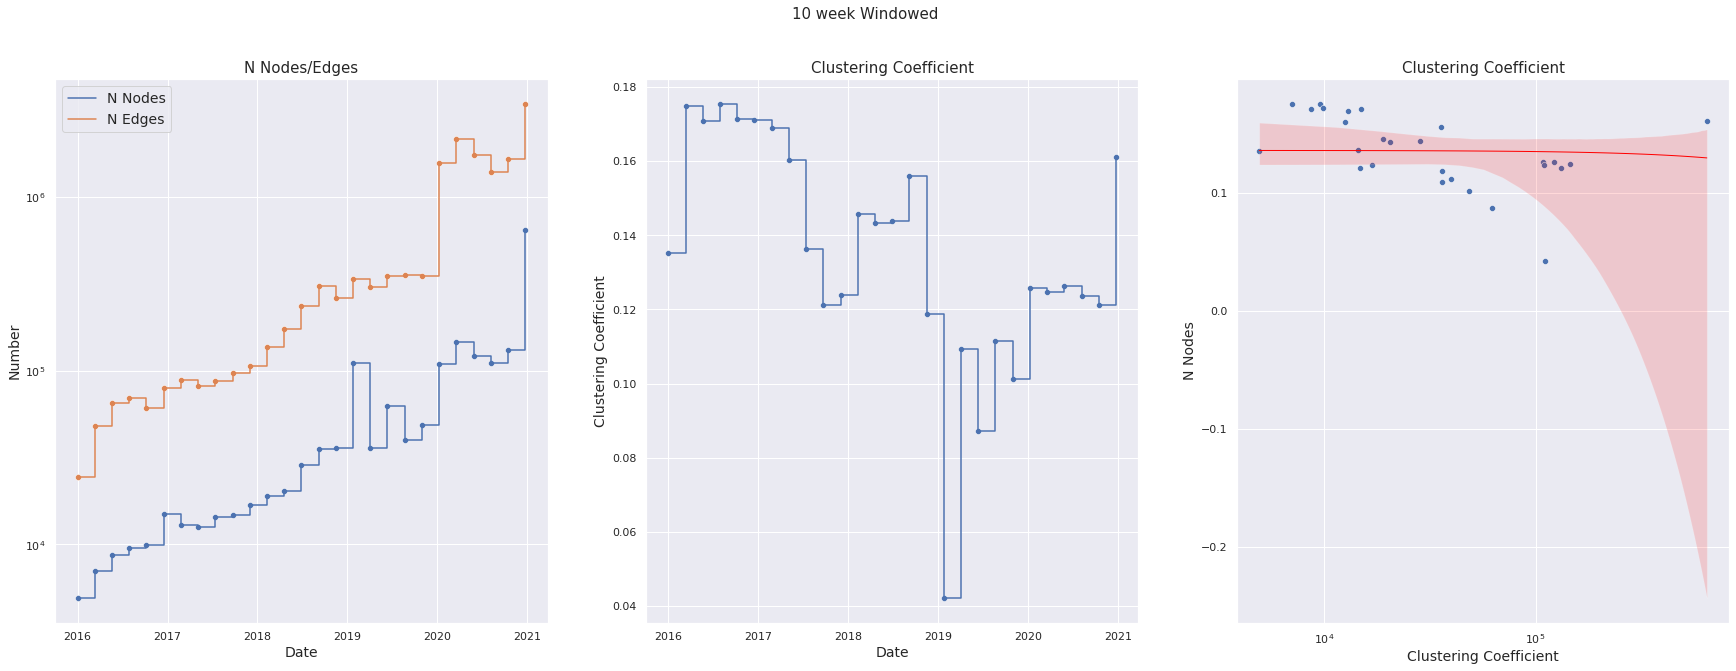

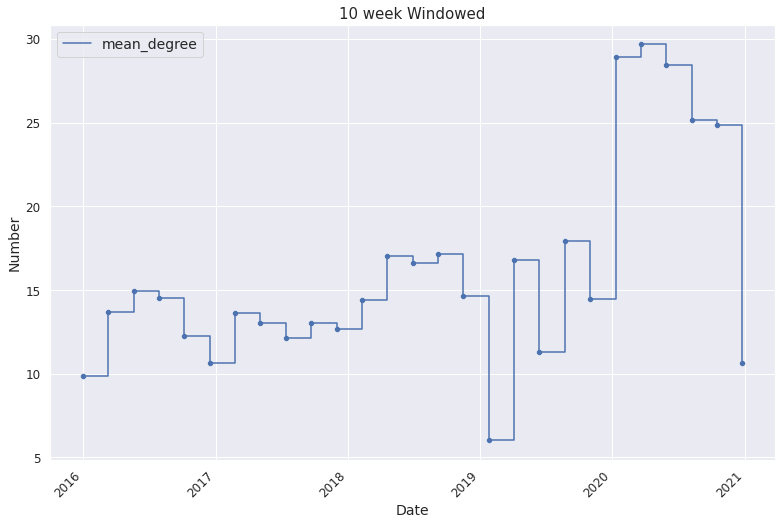

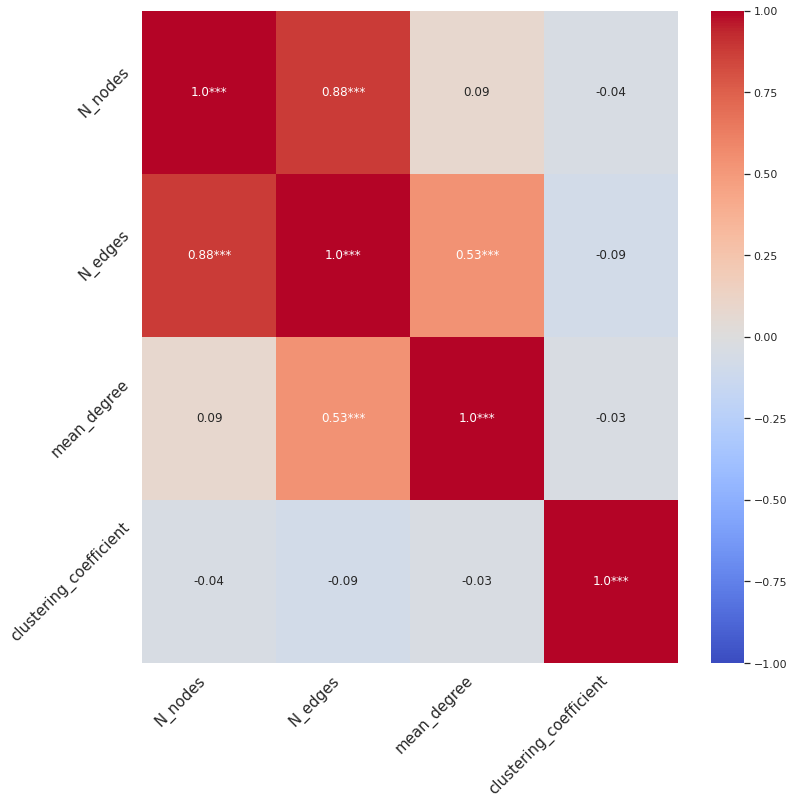

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('10 week Windowed', fontsize=15)

sns.lineplot(data=df_10_windowed['N_nodes'], label='N Nodes',drawstyle='steps-post',ax=ax[0])
sns.scatterplot(data=df_10_windowed['N_nodes'],ax=ax[0])
sns.lineplot(data=df_10_windowed['N_edges'], label='N Edges',drawstyle='steps-post',ax=ax[0])
sns.scatterplot(data=df_10_windowed['N_edges'],ax=ax[0])
ax[0].set_title('N Nodes/Edges', fontsize=15)
# ax[0].set_xticklabels(df_10_windowed.index.year, rotation=45, ha='right', fontsize=12)
ax[0].set_xlabel('Date', fontsize=14)
ax[0].set_ylabel('Number', fontsize=14)
ax[0].set_yscale('log')
ax[0].legend(fontsize=14)

sns.lineplot(data=df_10_windowed['clustering_coefficient'] ,drawstyle='steps-post',ax=ax[1])
sns.scatterplot(data=df_10_windowed['clustering_coefficient'],ax=ax[1])
ax[1].set_title('Clustering Coefficient', fontsize=15)
# ax[1].set_xticks(df_10_windowed.index.year, rotation=45, ha='right', fontsize=12)
ax[1].set_xlabel('Date', fontsize=14)
ax[1].set_ylabel('Clustering Coefficient', fontsize=14)

sns.scatterplot(x='N_nodes',y='clustering_coefficient',data=df_10_windowed,ax=ax[2])
sns.regplot(x='N_nodes',y='clustering_coefficient',data=df_10_windowed,ax=ax[2],scatter=False, color='red',line_kws={'linewidth':1})
ax[2].set_title('Clustering Coefficient', fontsize=15)
ax[2].set_xscale('log')
ax[2].set_xlabel('Clustering Coefficient', fontsize=14)
ax[2].set_ylabel('N Nodes', fontsize=14)

plt.show()

####

plt.figure(figsize=(13,8))
df_10_windowed.index = pd.to_datetime(df_10_windowed.index)
df_10_windowed.sort_index(inplace=True)

sns.lineplot(data=df_10_windowed['mean_degree'], label='mean_degree',drawstyle='steps-post')
sns.scatterplot(data=df_10_windowed['mean_degree'])

plt.title('10 week Windowed', fontsize=15)
# x axis size
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Date', fontsize=14)

plt.yticks(fontsize=12)
plt.ylabel('Number', fontsize=14)

plt.legend(fontsize=14)
plt.show()


####

rho = df_10_windowed.corr()
pval = df_10_windowed.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(data=rho, annot=(np.array(rho.round(2).astype(str) + p)),fmt = '',vmin=-1,vmax=1,cmap='coolwarm')

# rotate xticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=15)
plt.show()

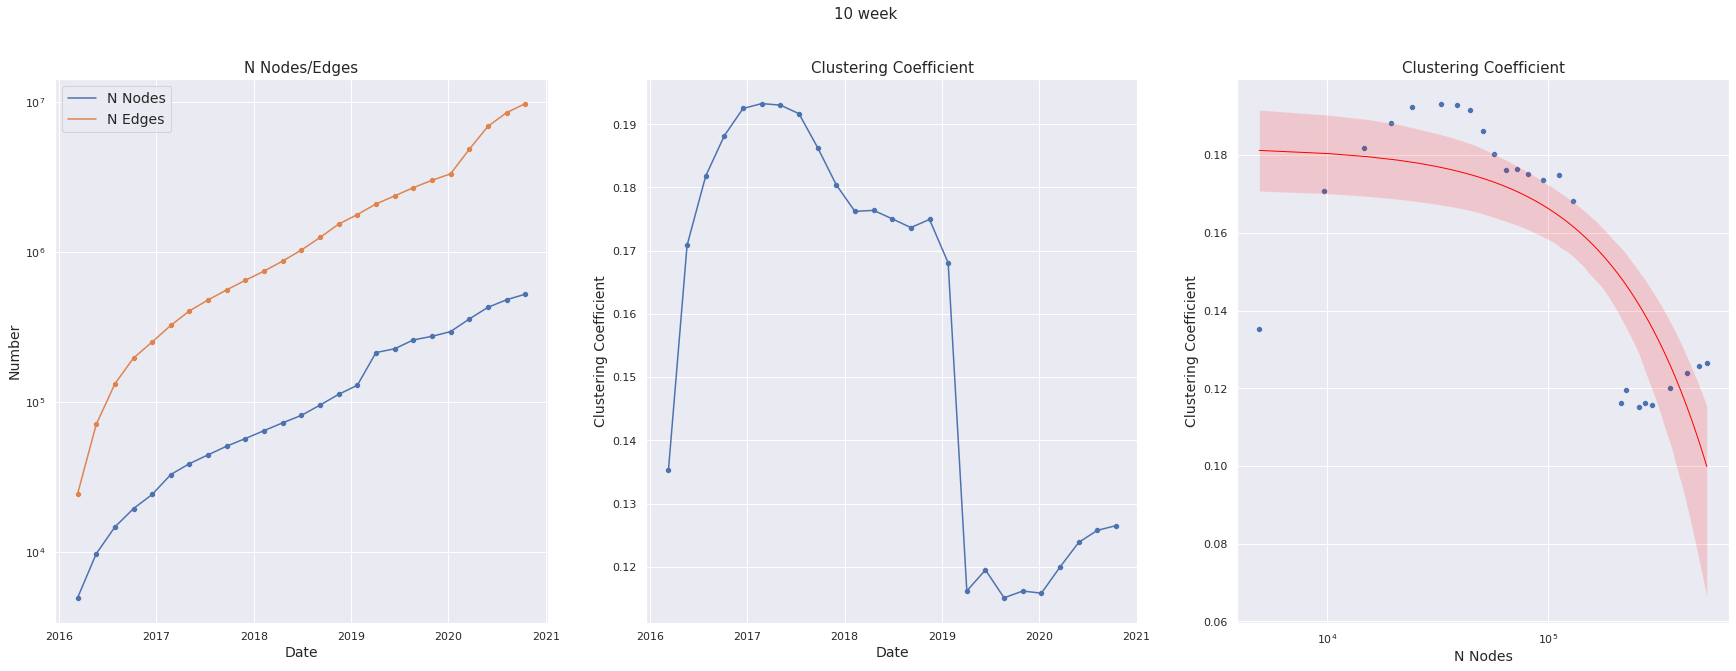

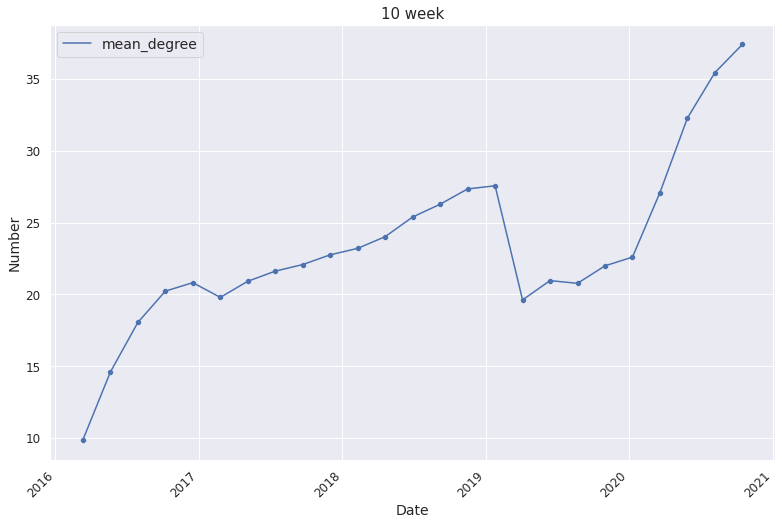

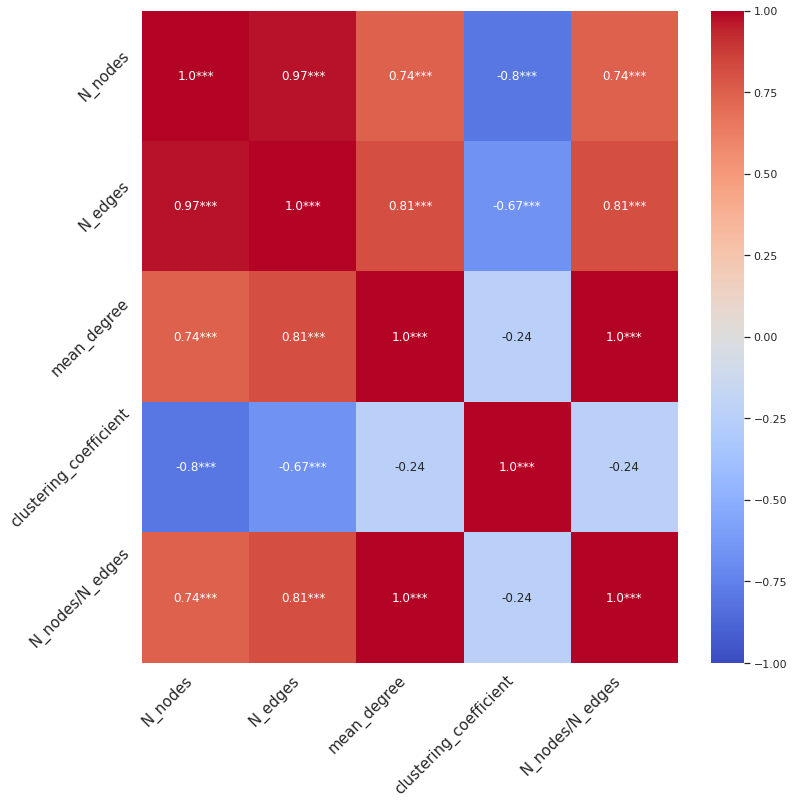

In [29]:
# subplots 
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('10 week', fontsize=15)

sns.lineplot(data=df_10['N_nodes'], label='N Nodes',ax=ax[0])
sns.scatterplot(data=df_10['N_nodes'],ax=ax[0])
sns.lineplot(data=df_10['N_edges'], label='N Edges',ax=ax[0])
sns.scatterplot(data=df_10['N_edges'],ax=ax[0])
ax[0].set_title('N Nodes/Edges', fontsize=15)
# ax[0].set_xticklabels(df_10.index.year, rotation=45, ha='right', fontsize=12)
ax[0].set_xlabel('Date', fontsize=14)
ax[0].set_ylabel('Number', fontsize=14)
ax[0].set_yscale('log')
ax[0].legend(fontsize=14)

sns.lineplot(data=df_10['clustering_coefficient'],ax=ax[1])
sns.scatterplot(data=df_10['clustering_coefficient'],ax=ax[1])
ax[1].set_title('Clustering Coefficient', fontsize=15)
ax[1].set_xlabel('Date', fontsize=14)
ax[1].set_ylabel('Clustering Coefficient', fontsize=14)

sns.scatterplot(x='N_nodes',y='clustering_coefficient',data=df_10,ax=ax[2])
sns.regplot(x='N_nodes',y='clustering_coefficient',data=df_10,ax=ax[2],scatter=False, color='red',line_kws={'linewidth':1})
ax[2].set_xscale('log')
ax[2].set_title('Clustering Coefficient', fontsize=15)
ax[2].set_ylabel('Clustering Coefficient', fontsize=14)
ax[2].set_xlabel('N Nodes', fontsize=14)

plt.show()

####

plt.figure(figsize=(13,8))
df_10.index = pd.to_datetime(df_10.index)
df_10.sort_index(inplace=True)
sns.lineplot(data=df_10['mean_degree'], label='mean_degree')
sns.scatterplot(data=df_10['mean_degree'])
plt.title('10 week', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Date', fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Number', fontsize=14)
plt.legend(fontsize=14)
plt.show()

####
rho = df_10.corr()
pval = df_10.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=rho, annot=(np.array(rho.round(2).astype(str) + p)),fmt = '',vmin=-1,vmax=1,cmap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=15)
plt.show()

In [30]:
# fig, ax1 = plt.subplots(figsize=(13,8))
# ax2 = ax1.twinx()
# sns.lineplot(data=df_10['N_nodes'], label='N Nodes',ax=ax1,color='tab:blue')
# sns.scatterplot(data=df_10['N_nodes'],ax=ax1,color='tab:blue')
# sns.lineplot(data=df_10['N_edges'], label='N Edges',ax=ax1,color='tab:green')
# sns.scatterplot(data=df_10['N_edges'],ax=ax1,color='tab:green')
# # ax1.set_title('N Nodes/Edges', fontsize=15)
# # ax1.set_xticklabels(df_10.index.year, rotation=45, ha='right', fontsize=12)
# ax1.set_xlabel('Date', fontsize=14)
# ax1.set_ylabel('Number', fontsize=14)
# ax1.set_yscale('log')
# ax1.legend(fontsize=14)

# sns.lineplot(data=df_10['clustering_coefficient'],ax=ax2,color='tab:orange')
# sns.scatterplot(data=df_10['clustering_coefficient'],ax=ax2,color='tab:orange')
# # ax2.set_title('Clustering Coefficient', fontsize=15)
# ax2.set_xlabel('Date', fontsize=14)
# ax2.set_ylabel('Clustering Coefficient', fontsize=14)
# plt.tight_layout()
# plt.show()

In [43]:
with open('/home/pelle/Master_Thesis/data/processed/wallstreetbets_temporal_graphs/graphs_10/graph_2016-03-11.gpickle' +'', 'rb') as handle:
    G = pickle.load(handle)

import time
df_scores = pd.read_csv('/home/pelle/Master_Thesis/data/processed/wallstreetbets_scores/graphs_10/df_score_before_2016-03-11.csv')
# degree centrality
print('done reading' + "/n")
start = time.time()
degree_centrality = nx.degree_centrality(G)
end = time.time()
print(end - start)

start = time.time()
degree = nx.degree(G)
end = time.time()
print(end - start)

start = time.time()
betweenness_centrality = nx.betweenness_centrality(G)
end = time.time()
print(end - start)

start = time.time()
average_shortest_path_length = nx.average_shortest_path_length(G)
end = time.time()
print(end - start)


df_scores['degree_centrality'] = df_scores['author'].map(degree_centrality)
df_scores['degree'] = df_scores['author'].map(degree)
df_scores['betweenness_centrality'] = df_scores['author'].map(betweenness_centrality)
df_scores['average_shortest_path_length'] = df_scores['author'].map(average_shortest_path_length)

KeyboardInterrupt: 

,author,sum_score,mean_score,date,degree_centrality
0,--_---__-_-_-_--_,1.0,1.000000,2016-03-11,NaN
1,--owo-,24.0,12.000000,2016-03-11,0.000406
2,-DontCallMeShort-,4.0,4.000000,2016-03-11,NaN
3,-Gabe-,32.0,2.666667,2016-03-11,0.001825
4,-GoCart-,10.0,2.500000,2016-03-11,0.000811
...,...,...,...,...,...
5706,zoomboo,3.0,1.500000,2016-03-11,0.000811
5707,zpwe,95.0,3.166667,2016-03-11,0.003650
5708,zrc219,45.0,2.812500,2016-03-11,0.002636
5709,zzpolarbear,1.0,1.000000,2016-03-11,0.000203
